In [2]:
library(ggplot2)
library(readxl)
library(tidyverse)
library(ggpubr)
library(scales)
library(cowplot)
library(patchwork)
library(data.table)
library(patchwork)
library(ggvenn)
library(ggplotify)
library(pheatmap)
library(kernlab)
library(precrec)
library(ROCR) 
library(pROC)
library(ggExtra)
library(oddsratio)
library(epitools)

In [3]:
theme_cleveland <- function (rotate = TRUE) 
{
    if (rotate) {
        theme(panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), 
            panel.grid.major.y = element_line(colour = "grey70", 
                linetype = "dashed"))
    }
    else {
        theme(panel.grid.major.x = element_line(colour = "grey70", 
            linetype = "dashed"), panel.grid.major.y = element_blank(), 
            panel.grid.minor.y = element_blank(), axis.title.x = element_blank(), 
            axis.ticks.x = element_blank())
    }
}

In [4]:
PC <- read.table("03_vcf/QC.eigenvec")
samples <- read_excel("03_vcf/samples.xlsx")

Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead."


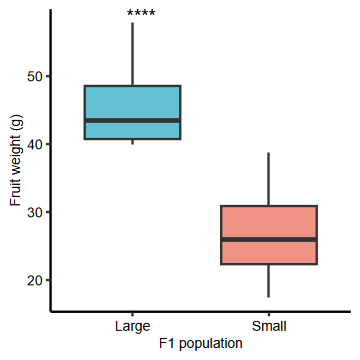

In [5]:
options(repr.plot.width=3, repr.plot.height=3)
Figure1A <- samples %>%
    dplyr::filter(Population=="F1") %>%
    mutate(Type=ifelse(`Fruit weight (g)`>40,'Large','Small')) %>%
    ggplot(aes(Type,`Fruit weight (g)`,fill=Type))+
        geom_boxplot(width=0.7)+
    theme(axis.text=element_text(size=8,color='black'),
              axis.title=element_text(size=8),
              panel.background = element_blank(),
          legend.position="none",
             axis.line = element_line(colour = "black",size = 0.5))+
  stat_compare_means(
    method = "wilcox.test",label = "p.signif"
  )+xlab("F1 population")+
scale_fill_manual(values = c("#0099B499", "#E64B3599"))
Figure1A

In [6]:
samples %>%
    dplyr::filter(Population=="F1") %>%
    mutate(Type=ifelse(`Fruit weight (g)`>40,'Large','Small')) %>%
    group_by(Type) %>%
    summarise(Weight=mean(`Fruit weight (g)`))

Type,Weight
<chr>,<dbl>
Large,45.3325
Small,26.8943


In [7]:
samples %>%
    dplyr::filter(Population=="F1") %>%
    mutate(Type=ifelse(`Fruit weight (g)`>40,'Large','Small'))  %>%
    group_by(Type) %>%
    summarise(Weight=mean(`Transverse diameter (mm)`))

Type,Weight
<chr>,<dbl>
Large,41.99484
Small,34.71787


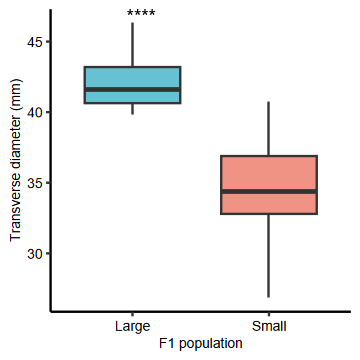

In [8]:
options(repr.plot.width=3, repr.plot.height=3)
Figure1B <- samples %>%
    dplyr::filter(Population=="F1") %>%
    mutate(Type=ifelse(`Fruit weight (g)`>40,'Large','Small')) %>%
    ggplot(aes(Type,`Transverse diameter (mm)`,fill=Type))+
        geom_boxplot(width=0.7)+
    theme(axis.text=element_text(size=8,color='black'),
              axis.title=element_text(size=8),
              panel.background = element_blank(),
          legend.position="none",
             axis.line = element_line(colour = "black",size = 0.5))+
  stat_compare_means(
    method = "wilcox.test",label = "p.signif"
  )+xlab("F1 population")+
scale_fill_manual(values = c("#0099B499", "#E64B3599"))
Figure1B

`geom_smooth()` using formula = 'y ~ x'


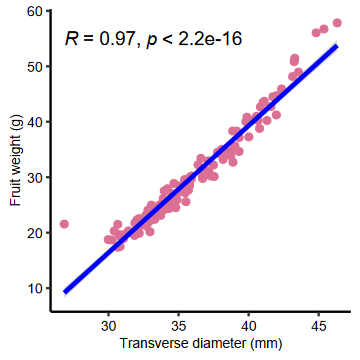

In [9]:
options(repr.plot.width=3, repr.plot.height=3)
Figure1C <- samples %>%
    dplyr::filter(Population=="F1") %>%
    ggplot(aes(`Transverse diameter (mm)`,`Fruit weight (g)`))+
        geom_point(color='#DB7093')+
    theme(axis.text=element_text(size=8,color='black'),
              axis.title=element_text(size=8),
              panel.background = element_blank(),
          legend.position="none",
             axis.line = element_line(colour = "black",size = 0.5))+
  stat_cor()+
  geom_smooth(method = "lm", se = TRUE,color='blue')
Figure1C

In [10]:
eqtl <- read.table("05_pQTL/F1_pQTL_results.txt",header=T)

In [12]:
head(eqtl)

,SNP,gene,beta,t.stat,p.value,FDR
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,Chr12:12909095,weight,10.857147,5.559129,1.734158e-07,0.05468806
2,Chr08:27828934,weight,7.742945,5.544056,1.856617e-07,0.05468806
3,Chr10:5394135,weight,-4.954959,-5.203152,8.456813e-07,0.13799131
4,Chr11:3251050,weight,8.632886,5.179670,9.369397e-07,0.13799131
5,Chr01:36751707,weight,10.515255,5.063844,1.547225e-06,0.18229866
6,Chr10:19088400,weight,-7.875388,-4.909073,2.993537e-06,0.29392291


In [13]:
#write.csv(eqtl,"Tables/Table S2.csv",quote=F,row.names=F)

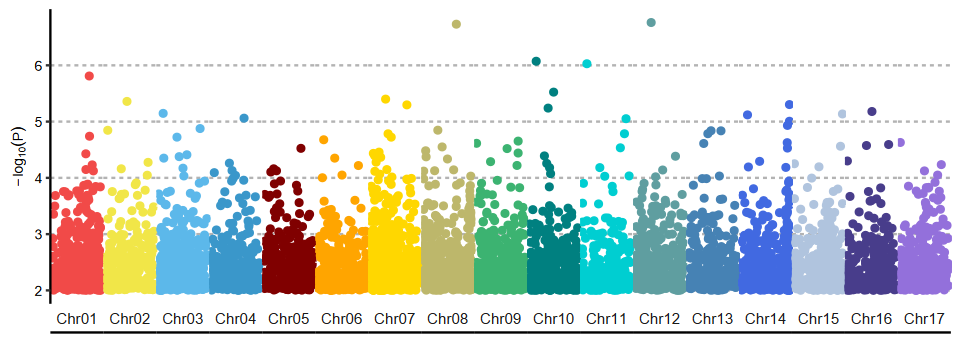

In [23]:
options(repr.plot.width=8, repr.plot.height=3)
Figure1D <- eqtl %>%
  mutate(CHR=str_extract(SNP,"\\w+:")) %>%
  mutate(CHR=gsub(":","",CHR)) %>%
  mutate(BP=str_extract(SNP,":(\\w+)")) %>%
  mutate(BP=gsub(":","",BP)) %>%
  mutate(BP=as.numeric(BP)) %>%
  ggplot(aes(BP/1000/1000,-log10(p.value),fill=CHR,color=CHR))+
  geom_point()+
  theme_cleveland()+
  facet_wrap(~CHR,ncol=17,scale='free_x',strip.position="bottom")+
  ylab(expression(-log[10](P)))+
  theme(axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        axis.title=element_text(size=8,color='black'),
        axis.text=element_text(size=8,color='black'),
        panel.spacing = unit(0,"lines"),strip.background = element_rect(color="white",fill='white'),
        legend.position='none',panel.background = element_blank(),
        axis.line = element_line(colour = "black",size = 0.5))+
  xlab("")+
  scale_color_manual(values =rev(c("#FFB6C1","#DB7093","#C71585","#DA70D6","#8B008B","#9370DB","#483D8B","#B0C4DE",
                                   "#4169E1","#4682B4","#5F9EA0","#00CED1","#008080","#3CB371","#BDB76B","#FFD700",
                                   "#FFA500","#800000",'#3A97CA','#5CB8EA','#F1E648',"#F14A48")))
Figure1D

In [24]:
QTL_table <- matrix(c(
  886, 5640,    # 你的SNP：在区间内，不在区间内
  72405, 510185 # 背景其他SNP：在区间内，不在区间内
), nrow = 2, byrow = TRUE)

In [25]:
fisher.test(QTL_table, alternative = "greater")


	Fisher's Exact Test for Count Data

data:  QTL_table
p-value = 0.003011
alternative hypothesis: true odds ratio is greater than 1
95 percent confidence interval:
 1.041676      Inf
sample estimates:
odds ratio 
  1.106878 


In [26]:
QTL_table_odd <- epitools::oddsratio(QTL_table, method = "wald")$measure
QTL_table_odd <- data.frame(QTL_table_odd)
QTL_table_odd$Type <- "QTL"

In [27]:
Fst <- read.table("03_vcf//Fst//large_small.windowed.weir.fst")

In [28]:
for(top in c(0.05,0.01,0.001)){
    Fst_top <- Fst %>%
        dplyr::select(CHROM=V1,BIN_START=V2,BIN_END=V3,MEAN_FST=V6) %>%
        arrange(desc(MEAN_FST)) %>%
        head(nrow(Fst)*top)
    print(tail(Fst_top,1))
    if(top==0.05){
        fn <- "top5"
    }else if(top==0.01){
        fn <- "top1"
    }else{
        fn <- "top0.1"
    }
    #write.table(Fst_top,paste0("03_vcf//Fst/Fst_",fn,".txt"),quote=F,sep="\t",row.names=F,col.names=F)
}

     CHROM BIN_START  BIN_END MEAN_FST
6072 Chr04  11330001 11340000 0.128394
     CHROM BIN_START  BIN_END MEAN_FST
1214 Chr01  26990001 27000000 0.261609
    CHROM BIN_START  BIN_END    MEAN_FST
121 Chr07  35430001 35440000 4.06779e-05


In [29]:
Fst_table <- matrix(c(
  256, 6269,    # 你的SNP：在区间内，不在区间内
  17553, 571562 # 背景其他SNP：在区间内，不在区间内
), nrow = 2, byrow = TRUE)

In [30]:
fisher.test(Fst_table, alternative = "greater")


	Fisher's Exact Test for Count Data

data:  Fst_table
p-value = 1.158e-05
alternative hypothesis: true odds ratio is greater than 1
95 percent confidence interval:
 1.192575      Inf
sample estimates:
odds ratio 
  1.329697 


In [31]:
Fst_table_odd <- epitools::oddsratio(Fst_table, method = "wald")$measure
Fst_table_odd <- data.frame(Fst_table_odd)
Fst_table_odd$Type <- "Fst top 5%"

In [32]:
odd <- rbind(QTL_table_odd,Fst_table_odd)

In [33]:
odd <- odd[-c(1,3),]

Warning message:
"`geom_errobarh()` was deprecated in ggplot2 4.0.0.
ℹ Please use the `orientation` argument of `geom_errorbar()` instead."


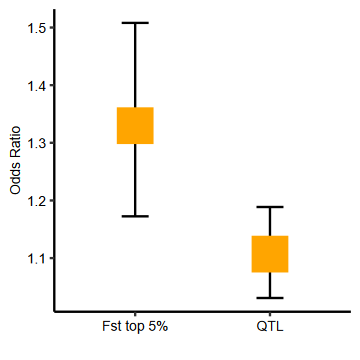

In [34]:
options(repr.plot.width=3, repr.plot.height=3)
Figure1E <- odd %>%
    ggplot(aes(x = estimate, y = Type)) +
    geom_errorbarh(aes(xmin = lower, xmax = upper),width = 0.2) +
    geom_point(size=10,shape = 15,color='orange') + 
    labs(x = "Odds Ratio", y = "") +
    theme(
        axis.title=element_text(size=8,color='black'),
        axis.text=element_text(size=8,color='black'),
        panel.spacing = unit(0,"lines"),strip.background = element_rect(color="white",fill='white'),
        legend.position='none',panel.background = element_blank(),
        axis.line = element_line(colour = "black",size = 0.5))+
coord_flip()
Figure1E

In [35]:
eqtl <- eqtl %>%
    arrange(p.value) %>%
    mutate(inx=1:nrow(eqtl))

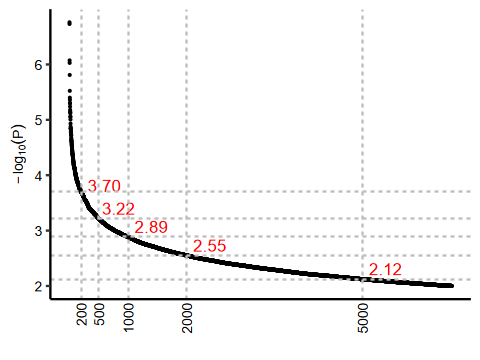

In [36]:
options(repr.plot.width=4, repr.plot.height=3)
Figure1F <- ggplot(eqtl,aes(inx,-log10(p.value))) +
    geom_point(size=0.1)+
  theme(axis.text.x = element_text(size=8,color='black',angle=90,vjust=0.5,hjust=1),
        axis.ticks.x = element_blank(),
        axis.title=element_text(size=8,color='black'),
        axis.text=element_text(size=8,color='black'),
        panel.spacing = unit(0,"lines"),strip.background = element_rect(color="white",fill='white'),
        legend.position='none',panel.background = element_blank(),
        axis.line = element_line(colour = "black",size = 0.5))+
annotate(geom = "text", x = 200, y = 3.70, color='red',label = "3.70", hjust = -0.2, vjust = 0, size = 3.5)+
geom_vline(xintercept = 200,linetype='dashed',color='grey')+
geom_hline(yintercept = 3.70,linetype='dashed',color='grey')+
annotate(geom = "text", x = 500, y = 3.22, color='red',label = "3.22", hjust = -0.1, vjust = -0.3, size = 3.5)+
geom_vline(xintercept = 500,linetype='dashed',color='grey')+
geom_hline(yintercept = 3.22,linetype='dashed',color='grey')+
annotate(geom = "text", x = 1000, y = 2.89, color='red',label = "2.89", hjust = -0.2, vjust = -0.3, size = 3.5)+
geom_vline(xintercept = 1000,linetype='dashed',color='grey')+
geom_hline(yintercept = 2.89,linetype='dashed',color='grey')+
annotate(geom = "text", x = 2000, y = 2.55, color='red',label = "2.55", hjust = -0.2, vjust = -0.3, size = 3.5)+
geom_vline(xintercept = 2000,linetype='dashed',color='grey')+
geom_hline(yintercept = 2.55,linetype='dashed',color='grey')+
annotate(geom = "text", x = 5000, y = 2.12, color='red',label = "2.12", hjust = -0.2, vjust = -0.3, size = 3.5)+
geom_vline(xintercept = 5000,linetype='dashed',color='grey')+
geom_hline(yintercept = 2.12,linetype='dashed',color='grey')+
xlab("")+
scale_x_continuous(breaks=c(200,500,1000,2000,5000),labels=c(200,500,1000,2000,5000))+
ylab(expression(-log[10](P)))
Figure1F

In [37]:
snps <- NULL
set.seed(123)
for(inx in c(200,500,1000,2000,5000)){
    Top <- eqtl$inx[1:inx]
    Random <- sample(eqtl$inx,inx)
    re1 <- data.frame(SNP=eqtl$SNP[Top],P=eqtl$p.value[Top],Number=inx,Type='Top')
    re2 <- data.frame(SNP=eqtl$SNP[Random],P=eqtl$p.value[Random],Number=inx,Type='Random')
    re <- rbind(re1,re2)
    snps <- rbind(snps,re)
}

In [38]:
#save(snps,file="05_pQTL/snps.Rdata")

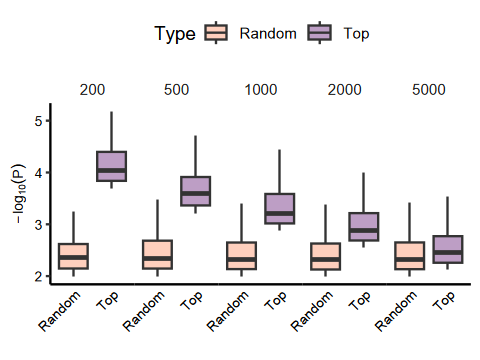

In [39]:
options(repr.plot.width=4, repr.plot.height=3)
Figure1G <- snps %>%
    ggplot(aes(Type,-log10(P),fill=Type)) +
        geom_boxplot(outliers = FALSE)+
facet_grid(~Number)+
  theme(axis.text.x = element_text(size=8,color='black',angle=45,vjust=1,hjust=1),
        axis.ticks.x = element_blank(),
        axis.title=element_text(size=8,color='black'),
        axis.text=element_text(size=8,color='black'),
        panel.spacing = unit(0,"lines"),strip.background = element_rect(color="white",fill='white'),
        legend.position='top',panel.background = element_blank(),
        axis.line = element_line(colour = "black",size = 0.5))+
ylab(expression(-log[10](P)))+xlab("")+
scale_fill_manual(values = c("#FDAF9199", "#925E9F99"))
Figure1G

In [28]:
pdf("Figures\\Figure1G.pdf",width=4,height=3)
Figure1G
dev.off()

pdf 
  2

`geom_smooth()` using formula = 'y ~ x'


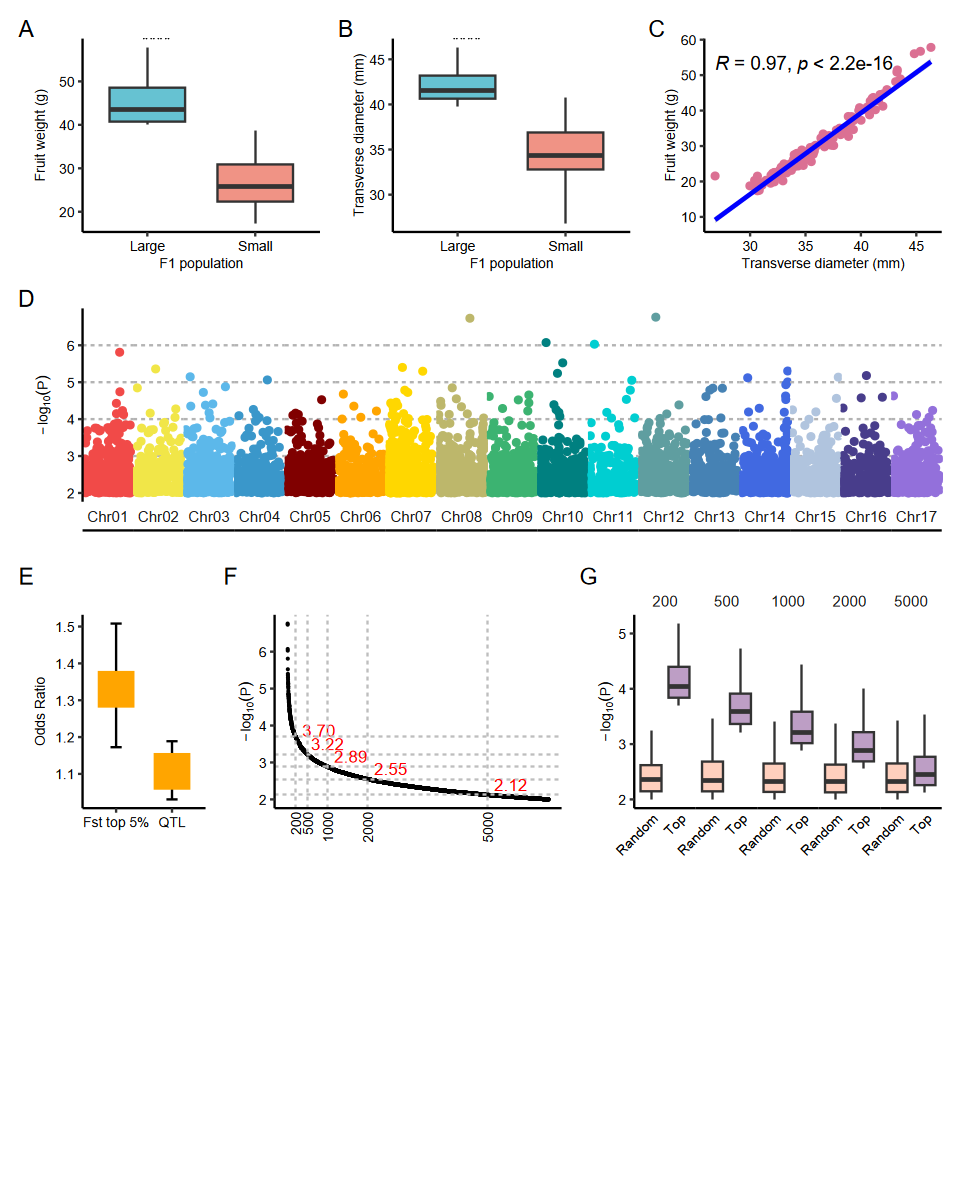

In [26]:
options(repr.plot.width=8, repr.plot.height=10)
((Figure1A|Figure1B|Figure1C)/Figure1D/
 ((Figure1E|Figure1F|Figure1G)+plot_layout(width=c(0.6,1.4,1.5)))/plot_spacer())+
plot_layout(height=c(1,1,1,1.5))+plot_annotation(tag_levels='A')

In [50]:
#pdf("Figures\\Figure 1.pdf",width=8,height=10)
#((Figure1A|Figure1B|Figure1C)/Figure1D/
#((Figure1E|Figure1F|Figure1G)+plot_layout(width=c(0.6,1.4,1.5)))/plot_spacer())+
#plot_layout(height=c(1,1,1,1.5))+plot_annotation(tag_levels='A')
#dev.off()

`geom_smooth()` using formula = 'y ~ x'


pdf 
  2

In [40]:
Q <- list.files("03_vcf//admixture",pattern="Q$")

In [41]:
Qlist <- NULL
for(q in Q){
    re <- read.table(paste0("03_vcf//admixture/",q))
    K <- str_extract(q,"\\d+")
    re <- data.frame(Samples=PC$V1,re)
    re <- reshape2::melt(re,id='Samples')
    re$K <- K
    Qlist <- rbind(Qlist,re)
}

In [42]:
mycolor <- c('#E64B35B2','#4DBBD5B2','#00A087B2','#3C5488B2','#F39B7FB2')

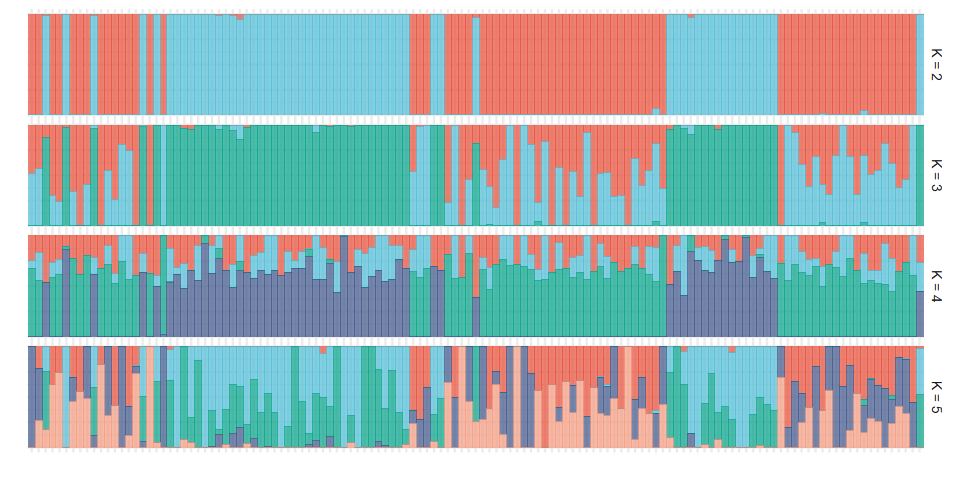

In [43]:
options(repr.plot.width=8, repr.plot.height=4)
FigureS1A <- Qlist %>%
    dplyr::filter(value!=1) %>%
    mutate(K= paste0("K = ",K)) %>%
    ggplot(aes(Samples,value,fill=variable))+
        geom_bar(stat='identity',width = 1)+
        theme_minimal()+
        theme(axis.title=element_text(size=8),
                axis.text=element_text(size=8),
                axis.text.y = element_blank(),
                axis.ticks.y = element_blank(),
                axis.text.x=element_blank(),
                legend.text=element_text(size=8),
                legend.position='none',panel.spacing = unit(0,"lines"),
             strip.text = element_text(size = 8))+
    facet_wrap(K~.,strip.position="right",ncol=1)+ylab("")+xlab("")+
scale_fill_manual(values=mycolor)
FigureS1A

In [44]:
cv <- read_excel("03_vcf//admixture/CV_error.xlsx")

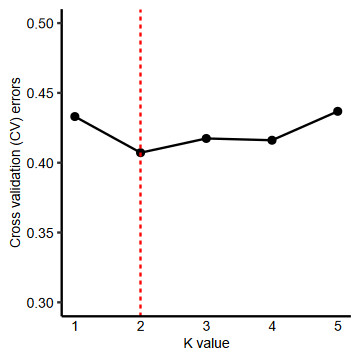

In [45]:
options(repr.plot.width=3, repr.plot.height=3)
FigureS1B <- cv %>%
    ggplot(aes(K,Error))+
        geom_point()+
        geom_line()+
        theme(axis.text=element_text(size=8,color='black'),
              axis.title=element_text(size=8),
              axis.ticks.x = element_blank(),
              axis.text.x = element_text(),
              panel.background = element_blank(),
              strip.text = element_text(size = 8, colour = "black"),
             axis.line = element_line(colour = "black",size = 0.5))+
scale_x_continuous(breaks=1:8,label=1:8)+
geom_vline(xintercept= 2,color='red',linetype='dashed')+
ylab("Cross validation (CV) errors")+xlab("K value")+
ylim(0.3,0.5)
FigureS1B

In [46]:
eqtl_noPC <- read.table("05_pQTL/F1_pQTL_results_without_PC.txt",header=T)

In [47]:
eqtl_number <- data.frame(Number=c(nrow(eqtl),nrow(eqtl_noPC)),Covariates=c("SNP+PC","SNP"))

In [49]:
eqtl_number

Number,Covariates
<int>,<chr>
6525,SNP+PC
115970,SNP


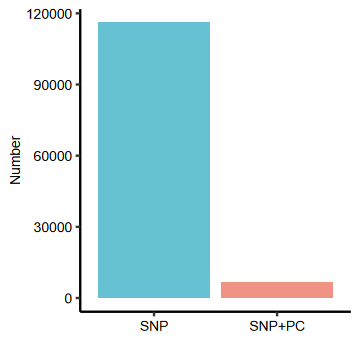

In [48]:
options(repr.plot.width=3, repr.plot.height=3)
FigureS1C <- eqtl_number %>%
    ggplot(aes(Covariates,Number,fill=Covariates))+
        geom_bar(stat='identity')+
    theme(axis.text=element_text(size=8,color='black'),
              axis.title=element_text(size=8),
              panel.background = element_blank(),
          legend.position="none",
             axis.line = element_line(colour = "black",size = 0.5))+
xlab("")+
scale_fill_manual(values = c("#0099B499", "#E64B3599"))
FigureS1C

In [36]:
weight <- read.table("05_pQTL/weight.txt",header=T)
geno <- read.table("05_pQTL/SNP.txt.gz",header=T)
cvrt <- read.table("05_pQTL//Covariates.txt",header=T)

In [37]:
Data <- rbind(weight,cvrt,geno)

In [38]:
Data[is.na(Data)] <- 0

In [39]:
rownames(Data) <- Data$id
Data <- Data[,-1]
Data <- t(Data)
Data <- data.frame(Data,check.names = F)

In [40]:
pc <- paste0("PC",1:10,collapse = "+")
f <- as.formula(paste0("weight~",pc))

In [41]:
data <- Data %>%
    dplyr::select(weight,SNP=`Chr04:15071688`,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10)

In [42]:
fit <- lm(f,data)

In [43]:
data$residual_weight <- residuals(fit)

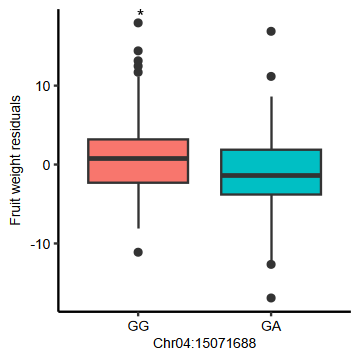

In [44]:
options(repr.plot.width=3, repr.plot.height=3)
Figure6B <- data %>%
    mutate(SNP=factor(SNP,labels=c('GG','GA'))) %>%
    ggplot(aes(SNP,residual_weight,fill=SNP))+
        geom_boxplot()+
    theme(axis.text=element_text(size=8,color='black'),
              axis.title=element_text(size=8),
              panel.background = element_blank(),
          legend.position="none",
             axis.line = element_line(colour = "black",size = 0.5))+
ylab("Fruit weight residuals")+xlab("Chr04:15071688")+
  stat_compare_means(
    method = "t.test",label = "p.signif"
  )
Figure6B

In [45]:
#save(Figure6B,file="Figure6B.Rdata")

In [50]:
load('05_pQTL//Rsquare.Rdata')

In [51]:
Rs1 <- data.frame(Rsquare=Rsquare,Covariates=c("SNP+PC"))
Rs2 <- data.frame(Rsquare=Rsquare_noPC,Covariates=c("SNP"))
Rs <- rbind(Rs1,Rs2)

In [52]:
Rs %>%
    group_by(Covariates) %>%
    summarise(Rsquare=mean(Rsquare))

Covariates,Rsquare
<chr>,<dbl>
SNP,0.1186158
SNP+PC,0.5814510


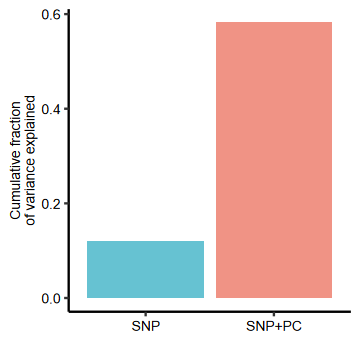

In [48]:
options(repr.plot.width=3, repr.plot.height=3)
FigureS1D <- Rs %>%
    group_by(Covariates) %>%
    summarise(Rsquare=mean(Rsquare)) %>%
    ggplot(aes(Covariates,Rsquare,fill=Covariates))+
        geom_bar(stat='identity')+
    theme(axis.text=element_text(size=8,color='black'),
              axis.title=element_text(size=8),
              panel.background = element_blank(),
          legend.position="none",
             axis.line = element_line(colour = "black",size = 0.5))+
xlab("")+ylab("Cumulative fraction\nof variance explained")+
scale_fill_manual(values = c("#0099B499", "#E64B3599"))
FigureS1D

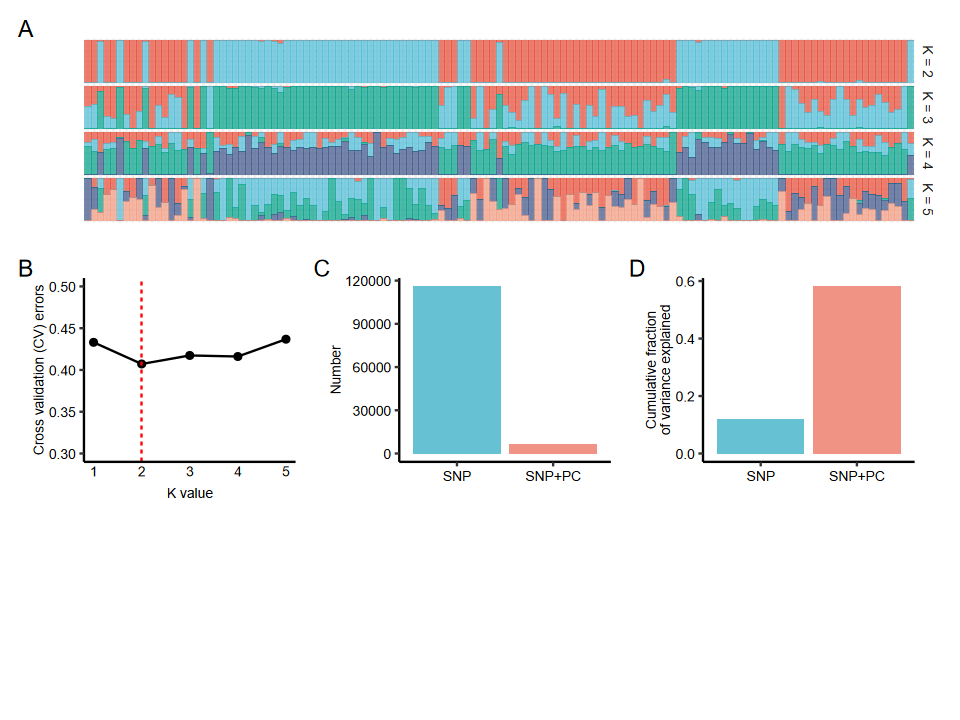

In [49]:
options(repr.plot.width=8, repr.plot.height=6)
(FigureS1A/(FigureS1B|FigureS1C|FigureS1D)/
plot_spacer())+plot_layout(height=c(1,1,1))+plot_annotation(tag_levels='A')

In [51]:
#pdf("Figures\\Figure S1.pdf",width=8,height=6)
#(FigureS1A/(FigureS1B|FigureS1C|FigureS1D)/
#plot_spacer())+plot_layout(height=c(1,1,1))+plot_annotation(tag_levels='A')
#dev.off()

pdf 
  2